<a href="https://colab.research.google.com/github/Anushka-GA/AI-ML-Month/blob/main/Copy_of_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS ON MOVIE REVIEWS** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import string
import pickle
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/imdb_reviews.csv')

In [ ]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# *DATA PREPROCESSING*

In [ ]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
print(f'Rows: {dataset.shape[1]}\nColumns: {dataset.shape[0]}')

Rows: 2
Columns: 50000


In [ ]:
print(f'Columns Names: {list(dataset.columns)}')

Columns Names: ['review', 'sentiment']


In [ ]:
nlp = English()                     ##changed
nlp = spacy.load("en_core_web_sm")          ##to this
stopwords = list(STOP_WORDS)
punctuations = string.punctuation
print( "stopwords: ",stopwords)
print('\n')
print("punctuations: ",punctuations)

stopwords:  ['beside', 'by', 'everything', 'his', 'yours', 'often', 'both', "'d", 'herself', 'hereby', 'ever', 'after', 'your', 'side', 'very', 'yet', 'part', 'what', 'somehow', 'during', 'still', 'therefore', 'latter', 'within', 'make', 'n’t', 'fifty', 'against', 'twelve', 'a', 'hereupon', 'should', '‘d', 'eleven', 'further', "'s", 'in', '‘ve', 'this', 'put', '’m', 'themselves', 'over', 'until', 'across', 'ours', 'less', 'cannot', 'myself', 'neither', 'behind', 'either', 'from', 'whenever', 'thru', 'someone', 'six', 'or', 'because', 'moreover', 'meanwhile', 'becoming', 'did', 'made', 'sixty', 'indeed', 'sometimes', 'several', 'we', "'ll", 'their', 'toward', 'even', "'re", 'per', 'thus', 'take', 'formerly', 'them', 'own', 'just', 'some', 'five', 'around', 'there', 'nor', 'he', 'now', 'used', 'down', 'it', 'had', 'done', 'amongst', 'least', 'ten', 'whatever', "'m", 'via', 'am', 'many', 'along', 'somewhere', 'therein', 'as', 'our', 'unless', 'where', 'do', 'here', 'into', 'twenty', 'to',

In [ ]:
def tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens   

In [ ]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [ ]:
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1)) 
tfvectorizer = TfidfVectorizer(tokenizer = tokenizer)
print(vectorizer,tfvectorizer)

CountVectorizer(tokenizer=<function tokenizer at 0x7f74803cdb90>) TfidfVectorizer(tokenizer=<function tokenizer at 0x7f74803cdb90>)


*MODEL TRAINING TESTING*

In [ ]:
X = dataset['review']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# *LOGISTIC REGRESSION*

In [ ]:
classifier = LogisticRegression()
LRmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Train the Model
LRmodel.fit(X_train,y_train)   
LRpred = LRmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')
print('Logistic Regression trained Model Saved')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix:
[[4413  638]
 [ 497 4452]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      5051
    positive       0.87      0.90      0.89      4949

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 88.64999999999999%
Logistic Regression trained Model Saved


# *DATA VISUALISATION*

In [ ]:
cm= confusion_matrix(y_test,LRpred)
cm

array([[4413,  638],
       [ 497, 4452]])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':LRpred})

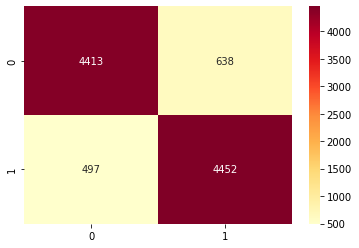

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

In [ ]:
ac1=accuracy_score(y_test,LRpred)*100
ac1

88.64999999999999

In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,LRpred,average=None)*100
f1

array([88.60556169, 88.69409304])

# *SUPPORT VECTOR MACHINE*

In [ ]:
SVCclassifier = LinearSVC()
SVCmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', SVCclassifier)])

# Train the Model
SVCmodel.fit(X_train,y_train)   
SVCpred = SVCmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,SVCpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,SVCpred)}')
print(f'Accuracy: {accuracy_score(y_test,SVCpred)*100}%')
print('LinearSVC trained Model Saved')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion Matrix:
[[4348  703]
 [ 609 4340]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      5051
    positive       0.86      0.88      0.87      4949

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy: 86.88%
LinearSVC trained Model Saved


*DATA VISUALISATION*

In [ ]:
cm1= confusion_matrix(y_test,SVCpred)
cm

NameError: ignored

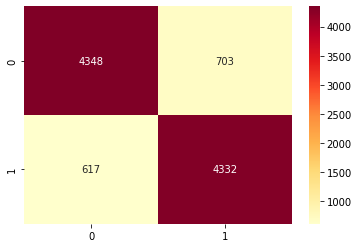

In [ ]:
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlOrRd" ,fmt='g')

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':SVCpred})

In [ ]:
ac2=accuracy_score(y_test,SVCpred)*100
ac2

86.8

In [ ]:
from sklearn.metrics import f1_score
f2=f1_score(y_test,SVCpred,average=None)*100
f2

array([86.82108626, 86.77884615])

*COMPARISON PLOTS*

In [ ]:
accuracy =  {ac1:'logistic regression', ac2:'SVC'}

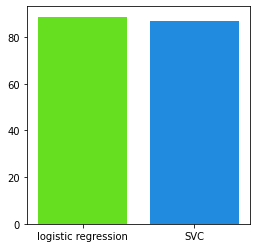

In [ ]:
plt.figure(figsize=(4, 4))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

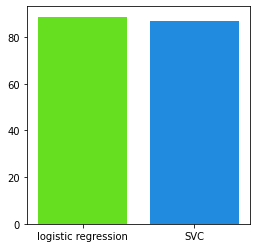

In [ ]:
plt.figure(figsize=(4, 4))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

*SAMPLE TESTING*

In [ ]:
pre = LRmodel.predict(["Henry cavill nailed the role perfectly. The fight scenes, the music, the cinematography, the whole atmosphere is beyond amazing. Netflix did it again"])
print(f'Prediction: {pre[0]}')

Prediction: positive


In [ ]:
#Testing the model
pre = SVCmodel.predict(["I think this is my first review. This series is so bad I had to write one. I don't understand the good score. I have tried on 2 separate occasions to watch this show. Haven't even gotten past the 2nd episode because it is SO BORING."])
print(f'Prediction: {pre[0]}')

Prediction: negative


In [ ]:
pre = SVCmodel.predict(["Henry cavill nailed the role perfectly. The fight scenes, the music, the cinematography, the whole atmosphere is beyond amazing. Netflix did it again"])
print(f'Prediction: {pre[0]}')

Prediction: positive


In [ ]:
pre=LRmodel.predict(["Thor is a film that takes risks - and they pay off wonderfully. The movie grounds itself in reality while keeping a mythological and fantasy-esqe tone, and it never loses sight of the humanity within the characters, with elevates this above standard superhero fare."])
print(f'Prediction: {pre[0]}')

Prediction: positive


In [ ]:
pre=LRmodel.predict(["Movies are always full of holes without any logic, this film, although shot with some beautiful road scenes, sunrise and sunset, desert....yet the whole story was just based on a ridiculous ground"])
print(f'Prediction: {pre[0]}')

Prediction: negative
